# Lung Cancer Detection

## Download Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/bhmdr45bh2-2.zip

--2021-06-23 15:59:53--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/bhmdr45bh2-2.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.36.227
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.36.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156614682 (149M) [application/octet-stream]
Saving to: ‘bhmdr45bh2-2.zip’

bhmdr45bh2-2.zip    100%[===================>] 149.36M  27.4MB/s    in 6.3s    

2021-06-23 16:00:00 (23.8 MB/s) - ‘bhmdr45bh2-2.zip’ saved [156614682/156614682]



## Extract Data

In [2]:
!unzip '/content/bhmdr45bh2-2.zip' -d '/tmp'

Archive:  /content/bhmdr45bh2-2.zip
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset.zip  


In [3]:
!unzip '/tmp/The IQ-OTHNCCD lung cancer dataset.zip' -d '/tmp'

Archive:  /tmp/The IQ-OTHNCCD lung cancer dataset.zip
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (1).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (10).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (100).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (101).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (102).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (103).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (104).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (105).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (106).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (107).jpg  
  inflating: /tmp/The IQ-OTHNCCD lung cancer data

## Splitting Data

In [4]:
import os

try:
    os.makedirs("/tmp/lung-cancer/training/benign/")
    os.makedirs("/tmp/lung-cancer/validation/benign/")
    os.makedirs("/tmp/lung-cancer/testing/benign/")

    os.makedirs("/tmp/lung-cancer/training/malignant/")
    os.makedirs("/tmp/lung-cancer/validation/malignant/")
    os.makedirs("/tmp/lung-cancer/testing/malignant/")

    os.makedirs("/tmp/lung-cancer/training/normal/")
    os.makedirs("/tmp/lung-cancer/validation/normal/")
    os.makedirs("/tmp/lung-cancer/testing/normal/")

except OSError:
    pass

In [9]:
import random
from shutil import copyfile
import numpy as np

BENGIN_SOURCE_DIR = "/tmp/The IQ-OTHNCCD lung cancer dataset/Bengin cases"
MALIGNANT_SOURCE_DIR = "/tmp/The IQ-OTHNCCD lung cancer dataset/Malignant cases"
NORMAL_SOURCE_DIR = "/tmp/The IQ-OTHNCCD lung cancer dataset/Normal cases"

def split_data(SOURCE, TRAINING, TESTING, VAL, SPLIT_SIZE_TRAIN, SPLIT_SIZE_VAL):
    dir_content = os.listdir(SOURCE)
    train_size = int(len(dir_content) * SPLIT_SIZE_TRAIN)
    val_size = int(len(dir_content) * SPLIT_SIZE_VAL)
    for i, image_name in enumerate(dir_content):
        if os.path.getsize(os.path.join(SOURCE, image_name)) > 0:
            if i < train_size:
                copyfile(os.path.join(SOURCE, image_name), 
                         os.path.join(TRAINING, image_name))
            elif (i >= train_size) and (i < (train_size + val_size)):
                copyfile(os.path.join(SOURCE, image_name), 
                         os.path.join(VAL, image_name))
            else:
                copyfile(os.path.join(SOURCE, image_name), 
                         os.path.join(TESTING, image_name))

TRAINING_BENGIN_DIR = "/tmp/lung-cancer/training/benign/"
TESTING_BENGIN_DIR = "/tmp/lung-cancer/testing/benign/"
VAL_BENGIN_DIR = "/tmp/lung-cancer/validation/benign/"

TRAINING_MALIGNANT_DIR = "/tmp/lung-cancer/training/malignant"
TESTING_MALIGNANT_DIR = "/tmp/lung-cancer/testing/malignant/"
VAL_MALIGNANT_DIR = "/tmp/lung-cancer/validation/malignant/"

TRAINING_NORMAL_DIR = "/tmp/lung-cancer/training/normal/"
TESTING_NORMAL_DIR = "/tmp/lung-cancer/testing/normal/"
VAL_NORMAL_DIR = "/tmp/lung-cancer/validation/normal/"

split_size_train = .8
split_size_val = .1
split_data(BENGIN_SOURCE_DIR, TRAINING_BENGIN_DIR, 
           TESTING_BENGIN_DIR, VAL_BENGIN_DIR,
           split_size_train, split_size_val)
split_data(MALIGNANT_SOURCE_DIR, TRAINING_MALIGNANT_DIR, 
           TESTING_MALIGNANT_DIR, VAL_MALIGNANT_DIR,
           split_size_train, split_size_val)
split_data(NORMAL_SOURCE_DIR, TRAINING_NORMAL_DIR, 
           TESTING_NORMAL_DIR, VAL_NORMAL_DIR,
           split_size_train, split_size_val)

In [10]:
print(len(os.listdir('/tmp/lung-cancer/training/benign/')))
print(len(os.listdir('/tmp/lung-cancer/training/malignant/')))
print(len(os.listdir('/tmp/lung-cancer/training/normal/')))
print()
print(len(os.listdir('/tmp/lung-cancer/validation/benign/')))
print(len(os.listdir('/tmp/lung-cancer/validation/malignant/')))
print(len(os.listdir('/tmp/lung-cancer/validation/normal/')))
print()
print(len(os.listdir('/tmp/lung-cancer/testing/benign/')))
print(len(os.listdir('/tmp/lung-cancer/testing/malignant/')))
print(len(os.listdir('/tmp/lung-cancer/testing/normal/')))

96
448
332

12
56
41

12
57
43


## Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

target_size = (224, 224)
TRAINING_DIR = "/tmp/lung-cancer/training/"
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range=.2,
    zoom_range=.2,
    fill_mode="nearest",
    horizontal_flip=True,
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=target_size,
    batch_size=10,
    class_mode="categorical",
    color_mode='grayscale',
)

VALIDATION_DIR = "/tmp/lung-cancer/validation/"
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=target_size,
    batch_size=10,
    class_mode="categorical",
    color_mode='grayscale',
)

Found 876 images belonging to 3 classes.
Found 109 images belonging to 3 classes.


In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
           'balanced',
            np.unique(train_generator.classes), 
            train_generator.classes)

weights = {}
for i, class_weight in enumerate(class_weights):
  weight = {i: class_weight}
  weights.update(weight)

In [ ]:
train_generator.class_indices

{'benign': 0, 'malignant': 1, 'normal': 2}

## Modeling with Convolution Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow import keras
 
model = Sequential()
 
model.add(Conv2D(32, (3, 3), input_shape=target_size + (1,)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

optimizer= Adam(learning_rate=7.4*1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=[keras.metrics.CategoricalAccuracy(name='accuracy'),
                      keras.metrics.Precision(name='precision'),
                      keras.metrics.Recall(name='recall'),
                      keras.metrics.AUC(name='auc')])

## Training

In [ ]:
initial_learning_rate = 7.4*1e-4
epochs = 100
decay = initial_learning_rate / epochs
 
def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)
    
callbacks = tf.keras.callbacks.LearningRateScheduler(lr_time_based_decay, verbose=1)
 
 
history = model.fit(train_generator,
                    epochs=100,
                    verbose=1,
                    class_weight=weights,
                    validation_data=validation_generator, 
                    callbacks=[callbacks])

Epoch 1/100

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0007133908220566809.
88/88 [==============================] - 8s 96ms/step - loss: 0.7506 - accuracy: 0.6187 - precision: 0.7487 - recall: 0.5000 - auc: 0.8455 - val_loss: 0.7851 - val_accuracy: 0.5963 - val_precision: 0.6196 - val_recall: 0.5229 - val_auc: 0.8244
Epoch 2/100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0007133855430036626.
88/88 [==============================] - 8s 95ms/step - loss: 0.6509 - accuracy: 0.7066 - precision: 0.7944 - recall: 0.6130 - auc: 0.8920 - val_loss: 0.5498 - val_accuracy: 0.6789 - val_precision: 0.7386 - val_recall: 0.5963 - val_auc: 0.9097
Epoch 3/100

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0007133749672100231.
88/88 [==============================] - 8s 94ms/step - loss: 0.5451 - accuracy: 0.7603 - precision: 0.8278 - recall: 0.7078 - auc: 0.9271 - val_loss: 0.4804 - val_accuracy: 0.7890 - val_precision: 0.7925 - val_recall: 0.

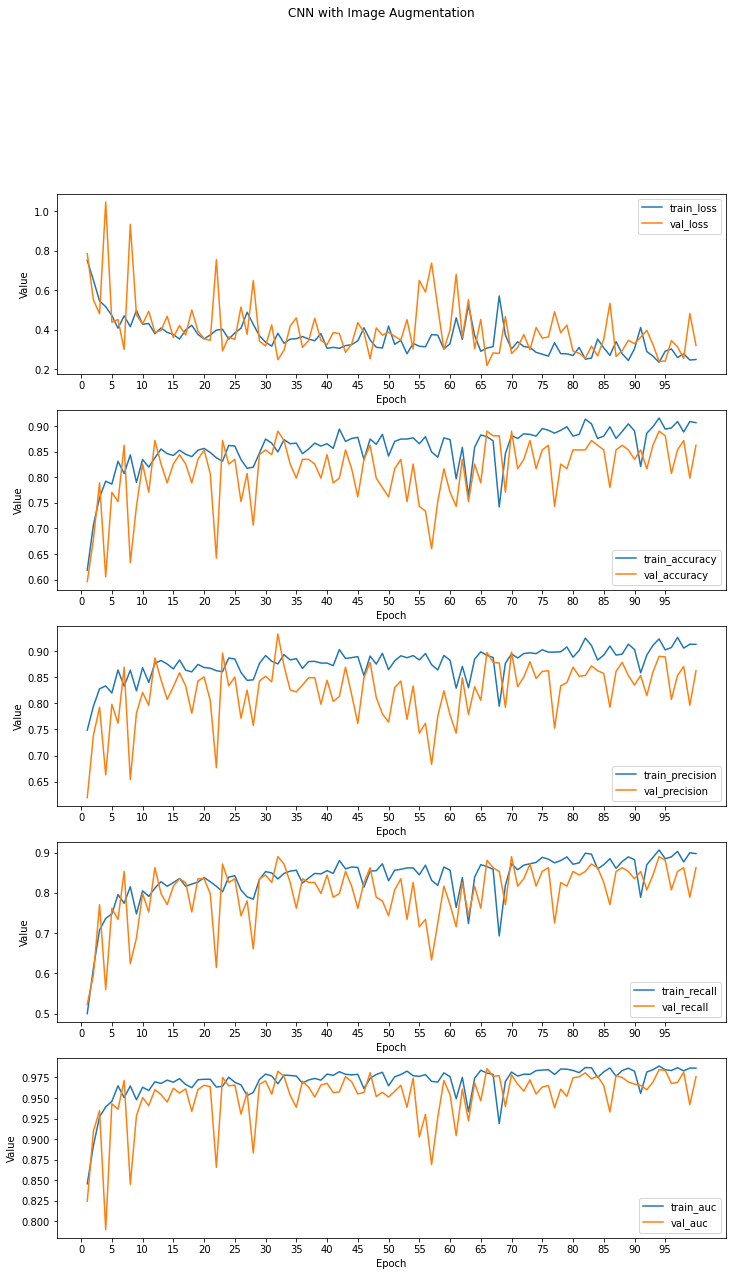

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
f, ax = plt.subplots(5, 1, figsize=(12, 20))
t = f.suptitle('CNN with Image Augmentation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

keys = list(history.history.keys())
metrics = [(keys[i], keys[i+5]) for i in range(len(keys)//2)]

epochs = len(history.history['accuracy'])
epoch_list = list(range(1,epochs+1))
for i, (train, test) in enumerate(metrics):
  ax[i].plot(epoch_list, history.history[train], label=f'train_{train}')
  ax[i].plot(epoch_list, history.history[test], label=f'{test}')
  ax[i].set_xticks(np.arange(0, epochs, 5))
  ax[i].set_ylabel('Value')
  ax[i].set_xlabel('Epoch')
  ax[i].legend(loc="best")

## Plot Confusion Matrix

In [ ]:
TEST_DIR = "/tmp/lung-cancer/testing"
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    batch_size= 1,
    class_mode="categorical",
    color_mode='grayscale',
    shuffle = False,
)

Found 112 images belonging to 3 classes.


In [ ]:
import numpy as np

filenames = test_generator.filenames
nb_samples = len(filenames)

predictions = model.predict(test_generator, steps = nb_samples)
y_pred = np.rint(predictions)
y_pred = tf.argmax(y_pred, axis=1)

y_true = test_generator.classes

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

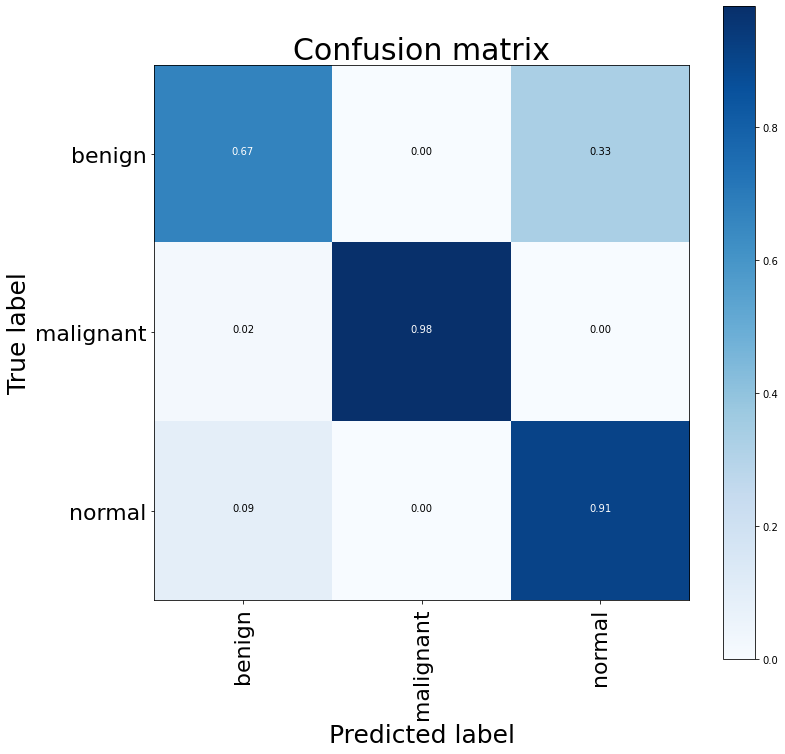

In [ ]:
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=validation_generator.class_indices.keys(), title="Confusion matrix")
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       1.00      0.98      0.99        57
           2       0.91      0.91      0.91        43

    accuracy                           0.92       112
   macro avg       0.84      0.85      0.85       112
weighted avg       0.92      0.92      0.92       112



In [ ]:
model.evaluate(test_generator)

112/112 [==============================] - 1s 8ms/step - loss: 0.2062 - accuracy: 0.9196 - precision: 0.9196 - recall: 0.9196 - auc: 0.9878


[0.20621487498283386,
 0.9196428656578064,
 0.9196428656578064,
 0.9196428656578064,
 0.9878427982330322]

## Save Model

In [ ]:
model.save('CNN_model_upweighting')

INFO:tensorflow:Assets written to: CNN_model_upweighting/assets


In [ ]:
!zip -r /content/CNN_model_upweighting.zip /content/CNN_model_upweighting/


  adding: content/CNN_model_upweighting/ (stored 0%)
  adding: content/CNN_model_upweighting/saved_model.pb (deflated 89%)
  adding: content/CNN_model_upweighting/variables/ (stored 0%)
  adding: content/CNN_model_upweighting/variables/variables.index (deflated 68%)
  adding: content/CNN_model_upweighting/variables/variables.data-00000-of-00001 (deflated 32%)
  adding: content/CNN_model_upweighting/keras_metadata.pb (deflated 91%)
  adding: content/CNN_model_upweighting/assets/ (stored 0%)


In [ ]:
from google.colab import files

files.download("/content/CNN_model_upweighting.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Load Model

In [8]:
import zipfile

model_path = '/content/drive/MyDrive/IB2C/CNN_model_upweighting.zip'
with zipfile.ZipFile(model_path, 'r') as zip_ref:
  zip_ref.extractall('./')

In [9]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/content/CNN_model_upweighting')

## ConvNet Visualization 

In [123]:
model.predict(x)

array([[1.8092659e-06, 9.9995911e-01, 3.9099290e-05]], dtype=float32)

In [20]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
        
    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [119]:
import cv2
import PIL
from PIL import ImageEnhance

def save_and_display_gradcam(img_path, 
                             heatmap, 
                             cam_path="cam.jpg", 
                             alpha=0.4,
                             brightness=0.5):
  img = cv2.imread(img_path)
  img1 = PIL.Image.open(img_path)

  converter = ImageEnhance.Brightness(img1)
  img1 = converter.enhance(brightness)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = heatmap * alpha + img1

  image_path = os.path.join(os.getcwd(), cam_path)
  cv2.imwrite(image_path, superimposed_img)
  display(Image(image_path))

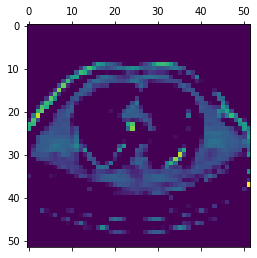

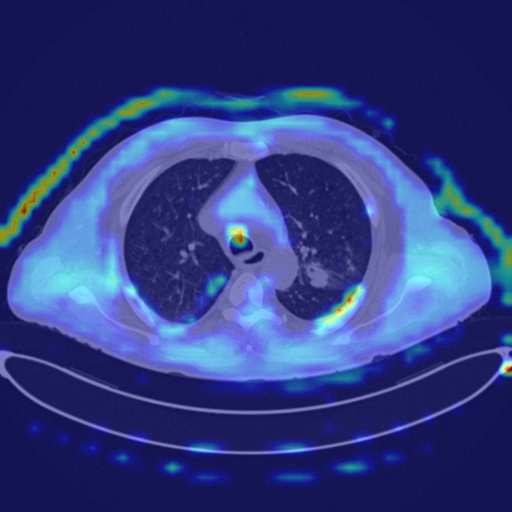

In [127]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

last_conv_layer_name = 'conv2d_2'

img_path = '/tmp/lung-cancer/training/malignant/Malignant case (41).jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = tf.image.rgb_to_grayscale(x)
x = np.expand_dims(x, axis=0)/255.

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(x, model, last_conv_layer_name)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

# Display heatmap
plt.matshow(heatmap)
plt.show()

save_and_display_gradcam(img_path, heatmap, alpha=0.5)